# Linear Regression

## Pipeline

1) Design model (input, output size, forward pass)

2) Construct loss and optimizer

3) Training loop

    - forward pass: compute prediction
    - backward pass: gradients
    - update weights

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

### 0) Prepare Data

In [6]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=0, random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
# reshape y into a column vector
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

### 1) Define the Model

In [7]:
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

### 2) Define Loss and Optimizer

In [8]:
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

### 3) Training Loop

epoch: 10, loss =  167.5518
epoch: 20, loss =  122.4561
epoch: 30, loss =  89.5198
epoch: 40, loss =  65.4571
epoch: 50, loss =  47.8721
epoch: 60, loss =  35.0180
epoch: 70, loss =  25.6196
epoch: 80, loss =  18.7465
epoch: 90, loss =  13.7192
epoch: 100, loss =  10.0413
epoch: 110, loss =  7.3503
epoch: 120, loss =  5.3810
epoch: 130, loss =  3.9397
epoch: 140, loss =  2.8847
epoch: 150, loss =  2.1123
epoch: 160, loss =  1.5469
epoch: 170, loss =  1.1329
epoch: 180, loss =  0.8297
epoch: 190, loss =  0.6078
epoch: 200, loss =  0.4452
epoch: 210, loss =  0.3261
epoch: 220, loss =  0.2389
epoch: 230, loss =  0.1750
epoch: 240, loss =  0.1282
epoch: 250, loss =  0.0939
epoch: 260, loss =  0.0688
epoch: 270, loss =  0.0504
epoch: 280, loss =  0.0369
epoch: 290, loss =  0.0271
epoch: 300, loss =  0.0198
epoch: 310, loss =  0.0145
epoch: 320, loss =  0.0106
epoch: 330, loss =  0.0078
epoch: 340, loss =  0.0057
epoch: 350, loss =  0.0042
epoch: 360, loss =  0.0031
epoch: 370, loss =  0.002

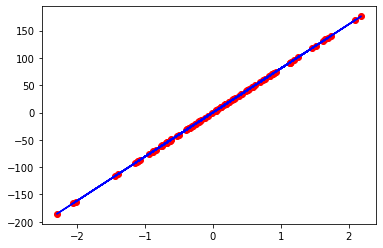

In [10]:
num_epochs = 1000
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y, y_predicted)

    # backward pass
    loss.backward()

    #update
    optimizer.step()

    # empty the gradient
    optimizer.zero_grad()

    if (epoch + 1) % 10 == 0:
        print(f'epoch: {epoch + 1}, loss = {loss.item(): .4f}')

# plot
predicted = model(X).detach().numpy() # gradient attribute is False
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()